In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("/content/heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [18]:
numerical=['age','trestbps','thalach','oldpeak','chol']
categorial=['sex','cp','fbs','restecg','exang']

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-11-b27f57c10c1b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


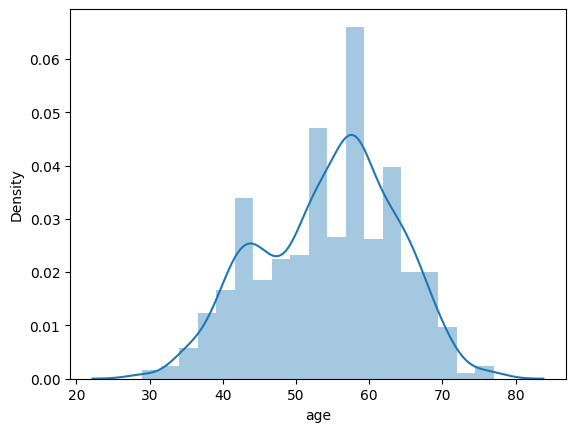

<ipython-input-11-b27f57c10c1b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


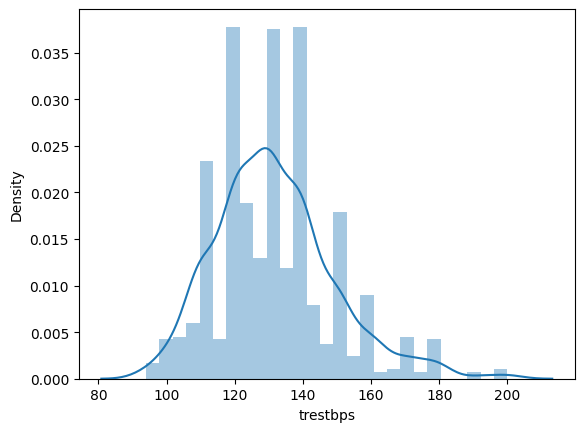

<ipython-input-11-b27f57c10c1b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


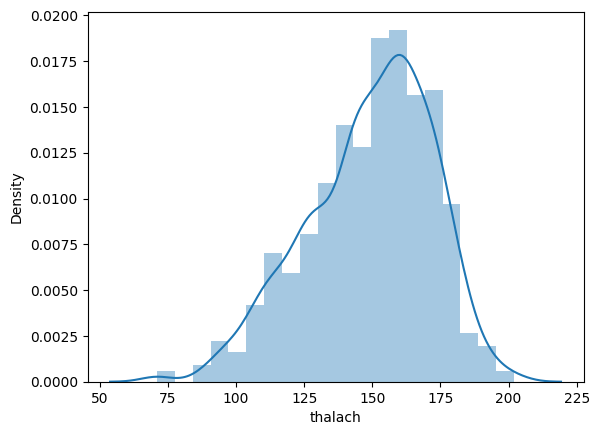

<ipython-input-11-b27f57c10c1b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


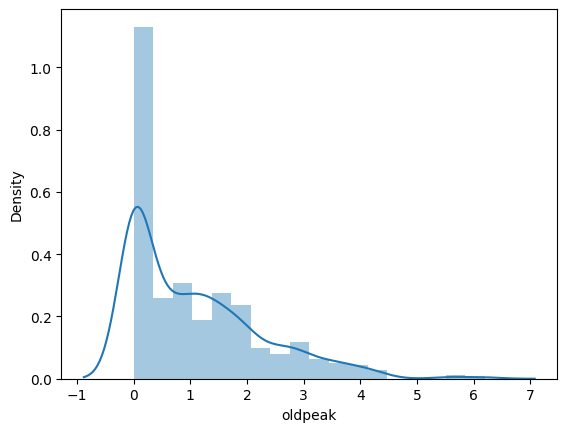

<ipython-input-11-b27f57c10c1b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


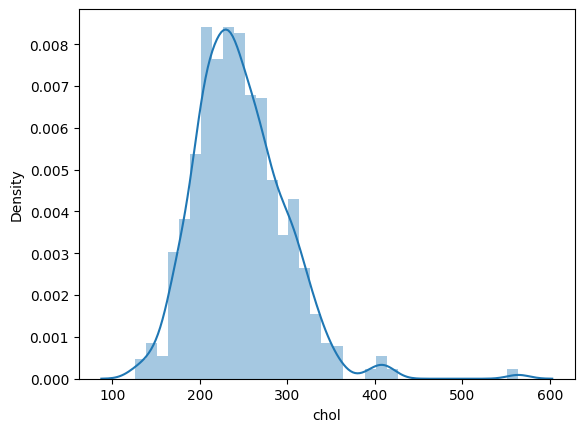

In [11]:
for col in numerical:
  sns.distplot(data[col])
  plt.xlabel(col)
  plt.show()


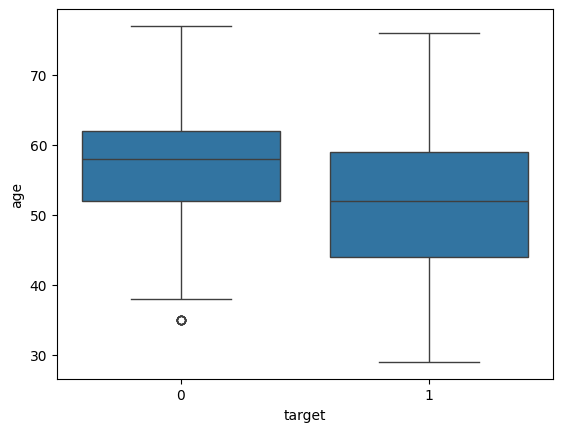

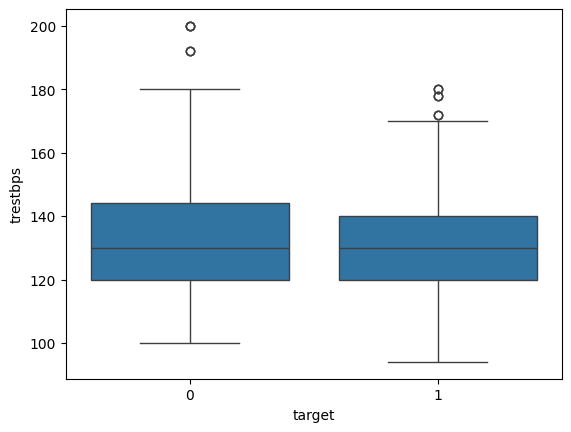

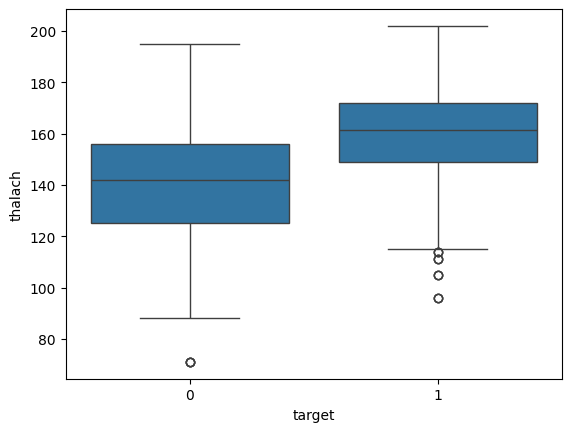

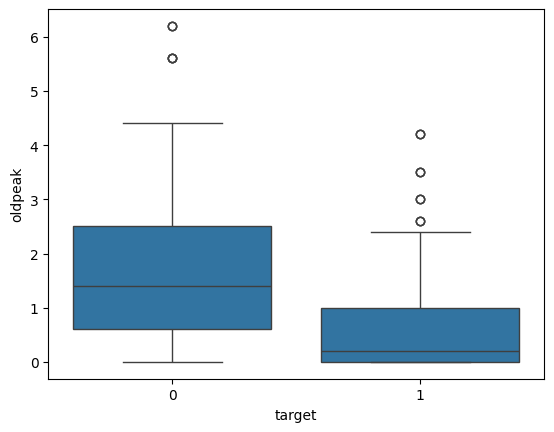

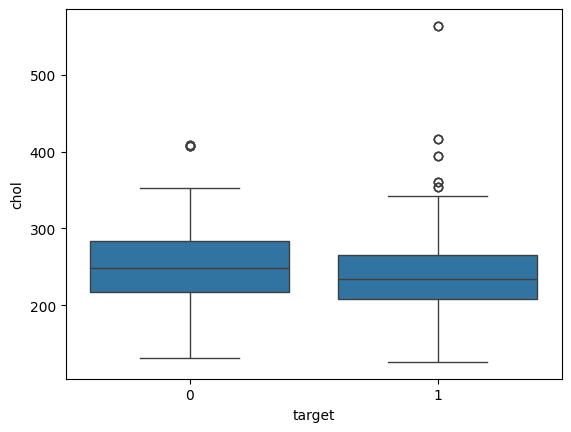

In [21]:
for col in numerical:
  sns.boxplot(y=data[col],x=data['target'])

  plt.show()

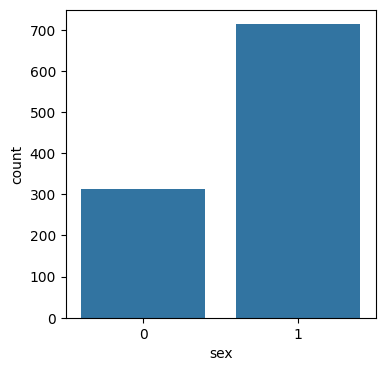

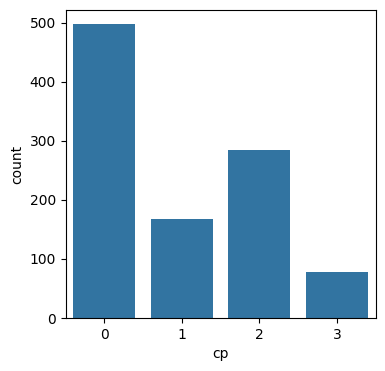

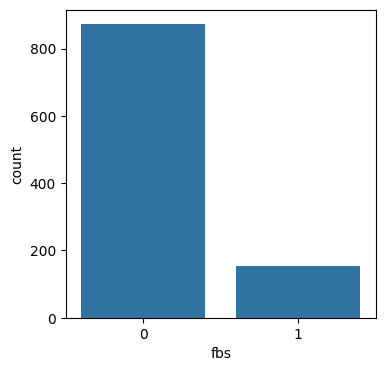

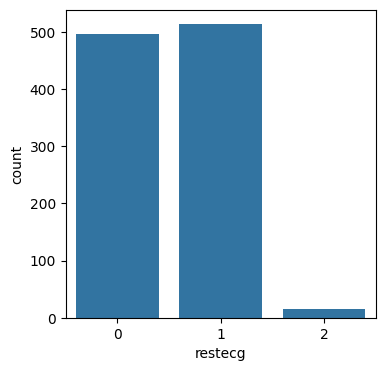

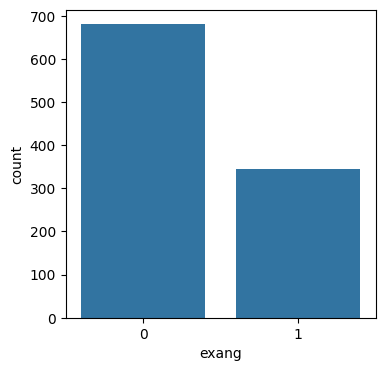

In [23]:
for col in categorial:
  plt.figure(figsize=(4,4))
  sns.countplot(x=data[col])
  plt.show()

<Axes: >

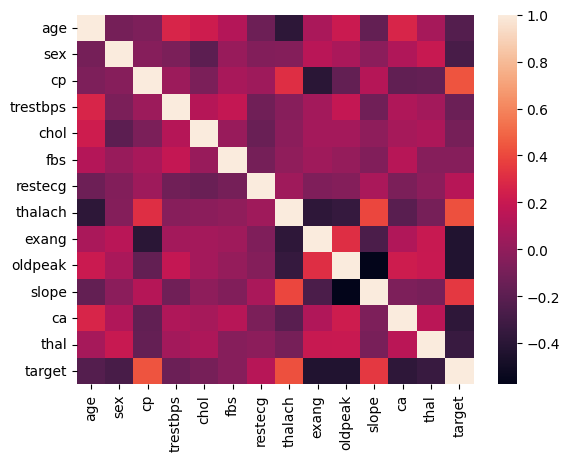

In [24]:
corr=data.corr()
sns.heatmap(corr)

In [28]:
new_data = data[['age', 'trestbps', 'thalach', 'oldpeak', 'chol','target']]

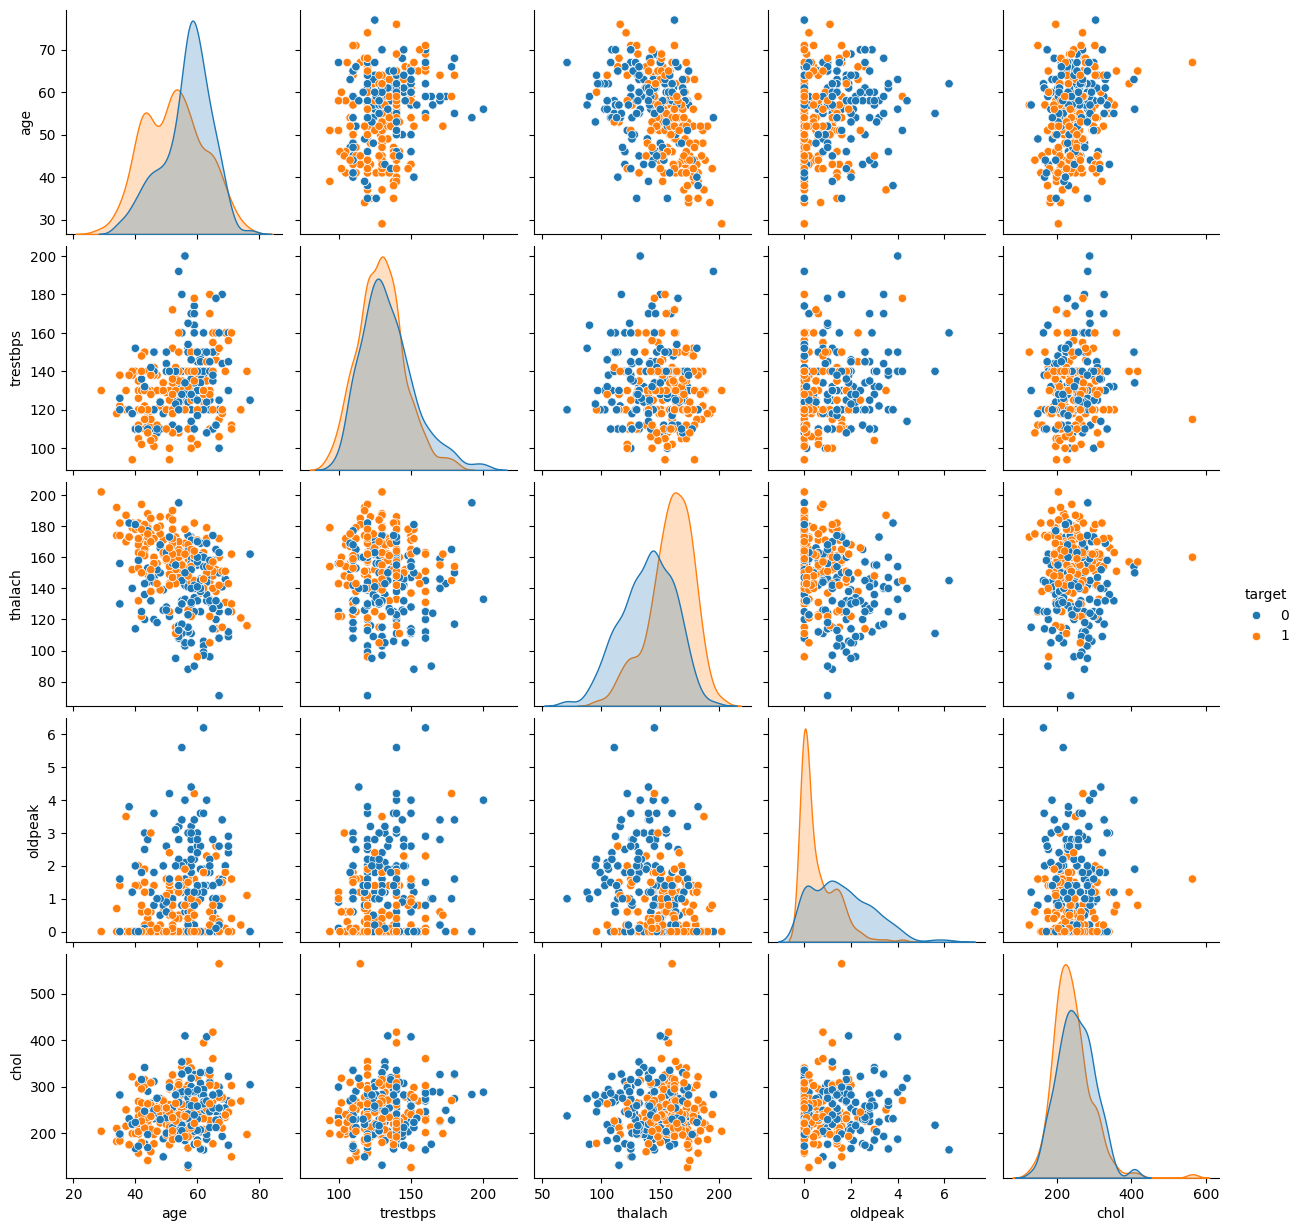

In [29]:
sns.pairplot(new_data,hue='target')

In [30]:
y=data['target']
x=data.drop(columns=['target'])

In [31]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [35]:
forest=RandomForestClassifier()
forest.fit(x_train,y_train)
y_pred=forest.predict(x_test)
(accuracy_score(y_test,y_pred))

0.9853658536585366

In [36]:
logistic=LogisticRegression(max_iter=100000)
logistic.fit(x_train,y_train)
y_pred=logistic.predict(x_test)
(accuracy_score(y_test,y_pred))

0.7951219512195122

In [50]:
knn=KNeighborsClassifier(n_neighbors=10,weights='distance',metric='euclidean')
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
(accuracy_score(y_test,y_pred))

1.0

In [39]:
param={'n_estimators':[100,200,300],
       'max_depth':[10,20,30],
       'min_samples_split':[2,5,10],
       'min_samples_leaf':[1,2,4]}

In [40]:
rf_random = RandomizedSearchCV(estimator = forest, param_distributions = param, n_iter = 10, cv = 5, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train)
print("Best parameters for Random Forest:", rf_random.best_params_)
y_pred_rf_tuned = rf_random.predict(x_test)
print("Accuracy with tuned Random Forest:", accuracy_score(y_test, y_pred_rf_tuned))


Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Accuracy with tuned Random Forest: 0.9853658536585366


In [41]:
param_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lr_random = RandomizedSearchCV(estimator = logistic, param_distributions = param_lr, n_iter = 10, cv = 5, random_state=42, n_jobs = -1)
lr_random.fit(x_train, y_train)
print("\nBest parameters for Logistic Regression:", lr_random.best_params_)
y_pred_lr_tuned = lr_random.predict(x_test)
print("Accuracy with tuned Logistic Regression:", accuracy_score(y_test, y_pred_lr_tuned))



Best parameters for Logistic Regression: {'C': 1}
Accuracy with tuned Logistic Regression: 0.7951219512195122


In [43]:
param_knn = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
             'weights': ['uniform', 'distance'],
             'metric': ['euclidean', 'manhattan', 'minkowski']}
knn_random = RandomizedSearchCV(estimator = knn, param_distributions = param_knn, n_iter = 10, cv = 5, random_state=42, n_jobs = -1)
knn_random.fit(x_train, y_train)
print("\nBest parameters for KNN:", knn_random.best_params_)
y_pred_knn_tuned = knn_random.predict(x_test)
print("Accuracy with tuned KNN:", accuracy_score(y_test, y_pred_knn_tuned))


Best parameters for KNN: {'weights': 'distance', 'n_neighbors': 15, 'metric': 'euclidean'}
Accuracy with tuned KNN: 1.0


In [44]:
cm1=confusion_matrix(y_test,y_pred)
cm2=confusion_matrix(y_test,y_pred_rf_tuned)
cm3=confusion_matrix(y_test,y_pred_lr_tuned)

<Axes: >

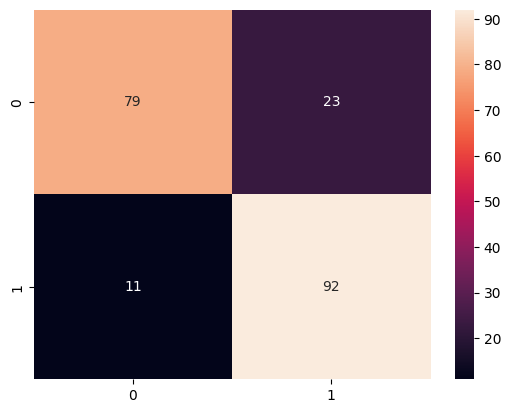

In [45]:
sns.heatmap(cm1,annot=True)

<Axes: >

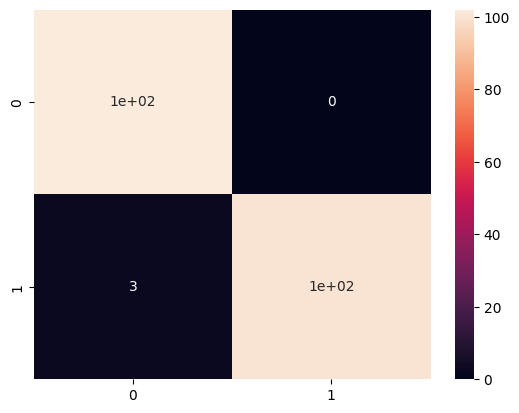

In [46]:
sns.heatmap(cm2,annot=True)

<Axes: >

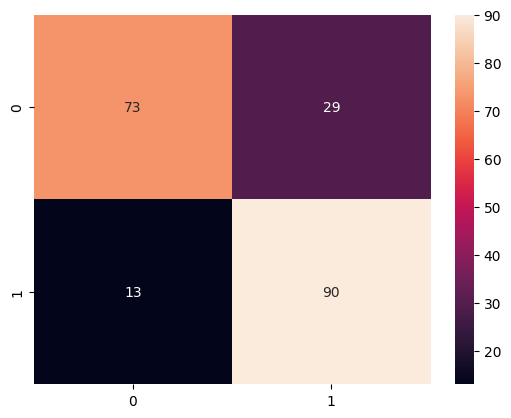

In [47]:
sns.heatmap(cm3,annot=True)

In [53]:
x=scaler.fit_transform(x)

In [54]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights='distance')
scores = cross_val_score(knn, x, y, cv=5)
print("CV Accuracy Scores:", scores)
print("Mean CV Accuracy:", scores.mean())

CV Accuracy Scores: [0.9804878  0.97073171 0.97073171 1.         0.98536585]
Mean CV Accuracy: 0.9814634146341463


In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(x)
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean')
knn.fit(x, y)


KNeighborsClassifier(metric='euclidean', weights='distance')

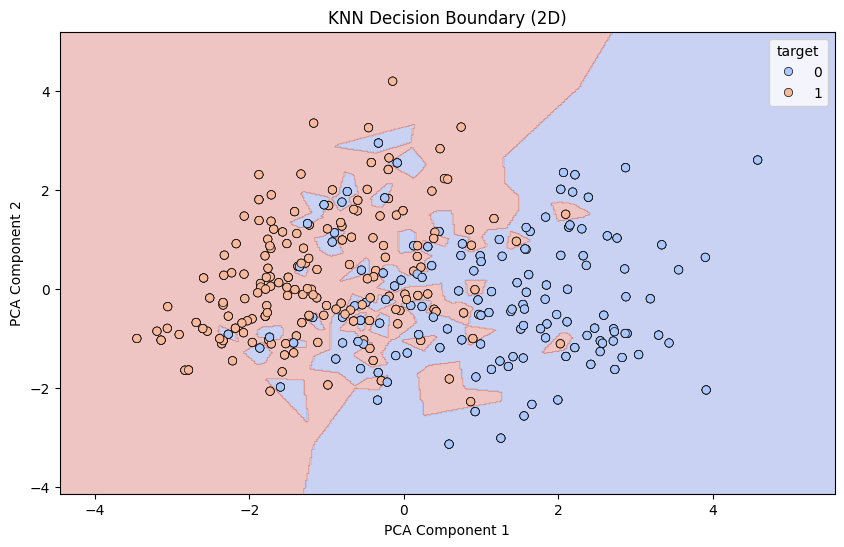

In [61]:
import numpy as np
h = 0.02
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y, palette='coolwarm', edgecolor='k')
plt.title("KNN Decision Boundary (2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [57]:
data=pd.read_csv("/content/heart.csv")

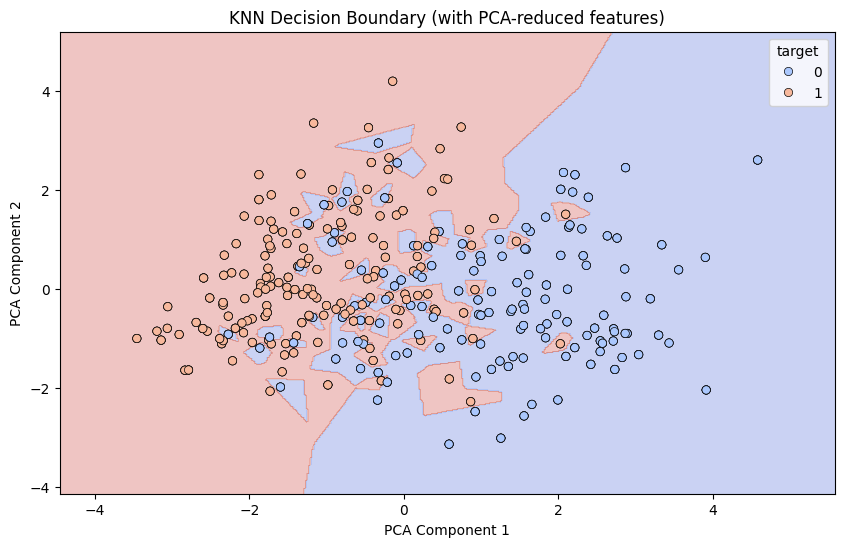

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


X = data.drop('target', axis=1)
y = data['target']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

knn = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean')
knn.fit(X_reduced, y)

# Create meshgrid for plotting
h = 0.02
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict for each point on the grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y, palette='coolwarm', edgecolor='k')
plt.title("KNN Decision Boundary (with PCA-reduced features)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [59]:
data=pd.read_csv("/content/heart.csv")

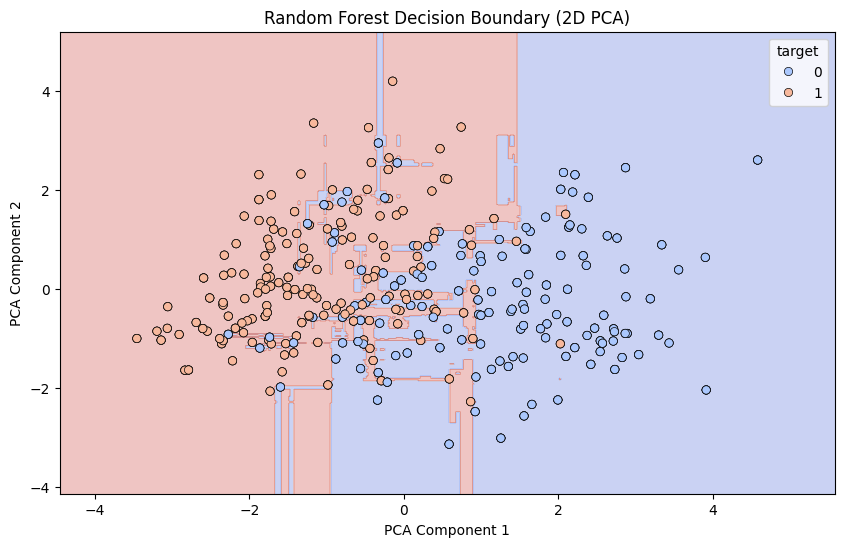

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = data.drop('target', axis=1)
y = data['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_reduced, y)

h = 0.02
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y, palette='coolwarm', edgecolor='k')

plt.title('Random Forest Decision Boundary (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
